In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df=pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
df.shape

(517, 31)

In [4]:
df[df.columns].isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'dayfri'}>],
       [<Axes: title={'center': 'daymon'}>,
        <Axes: title={'center': 'daysat'}>,
        <Axes: title={'center': 'daysun'}>,
        <Axes: title={'center': 'daythu'}>,
        <Axes: title={'center': 'daytue'}>],
       [<Axes: title={'center': 'daywed'}>,
        <Axes: title={'center': 'monthapr'}>,
        <Axes: title={'center': 'monthaug'}>,
        <Axes: title={'center': 'monthdec'}>,
        <Axes: title={'center': 'monthfeb'}>],
       [<Axes: title={'center': 'monthjan'}>,
        <Axes: title={'center': 'monthjul'}>,
        <Axes: title={'center': 'monthjun'}>,
        <A

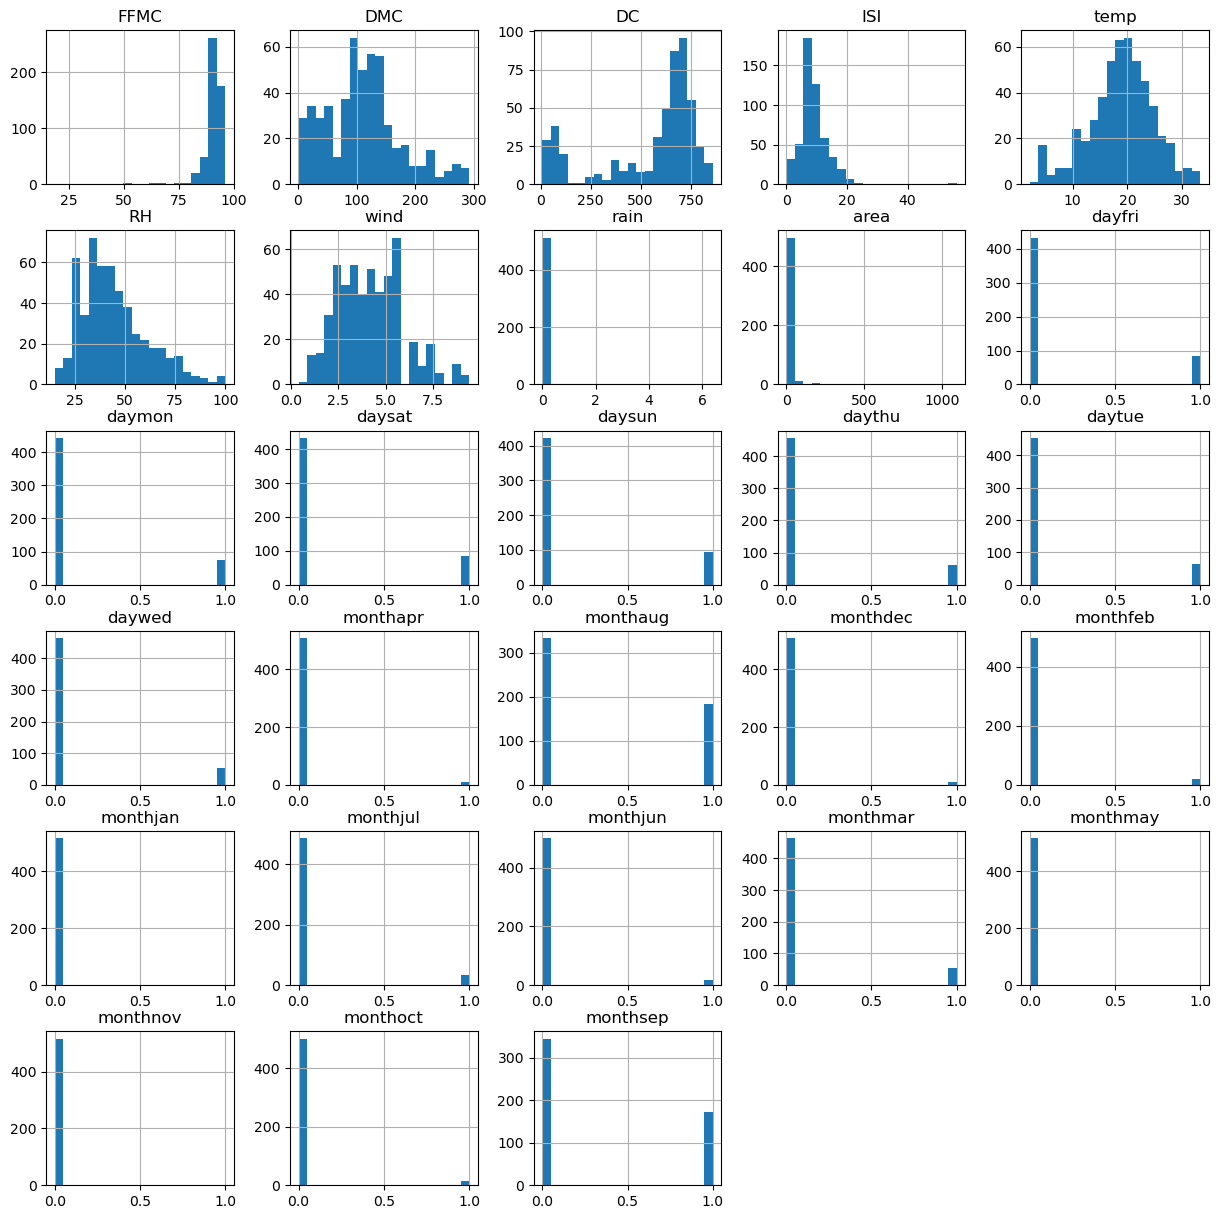

In [7]:
df.hist(figsize=(15,15), bins=20)

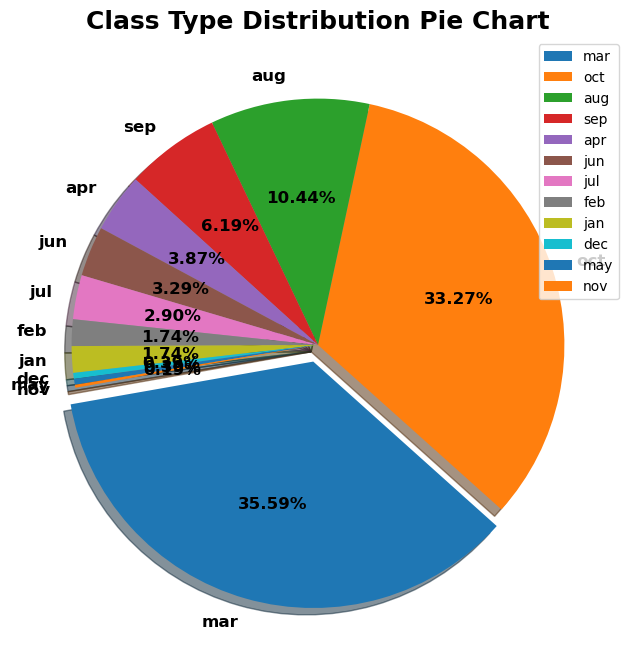

In [8]:
import matplotlib.pyplot as plt

# Calculate the counts and get unique month labels
month_counts = df['month'].value_counts()
unique_months = df['month'].unique()

# Create an explode list with zeros, and adjust the first element to add a little extra space
explode = [0.07 if i == 0 else 0 for i in range(len(unique_months))]

plt.figure(figsize=(12, 8))
plt.pie(month_counts,
        labels=unique_months,
        explode=explode,
        autopct='%.2f%%',
        shadow=True,
        startangle=190,
        textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize=18, fontweight='bold')
plt.show()

In [9]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

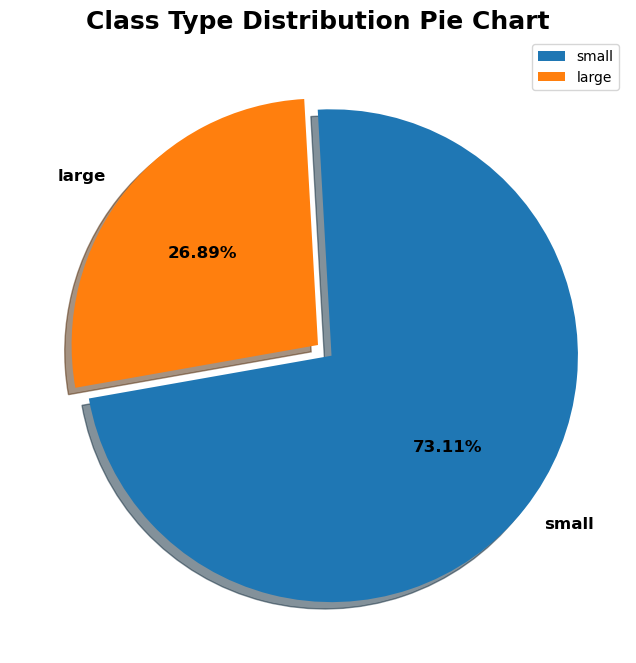

In [10]:
plt.figure(figsize = (12,8))
plt.pie(df['size_category'].value_counts(),
       labels=df.size_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [11]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [12]:
df1 = df.copy()

In [13]:
x1 = df1.iloc[:,2:30]
x1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y1 = df1.iloc[:,-1]
y1

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [15]:
x = df.drop(columns=['month','day','size_category'])
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y = df.iloc[:,-1]
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

# Train / Test Split

In [17]:
x1_tr,x1_test,y1_tr,y1_test = train_test_split(x1,y1, test_size = 0.2,random_state=42)

In [18]:
x1_tr.shape, y1_tr.shape, x1_test.shape, y1_test.shape

((413, 28), (413,), (104, 28), (104,))

# Linear

In [19]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
model_linear1 = SVC(kernel = "linear")
model_linear1.fit(x1_tr,y1_tr)

SVC(kernel='linear')

In [21]:
pred_test_linear1 = model_linear1.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, pred_test_linear1))

Accuracy: 1.0


In [22]:
clf=SVC()
param_grid=[{'kernel':['linear'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x1_tr,y1_tr)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2],
                          'kernel': ['linear']}])

In [23]:
gsv.best_params_,gsv.best_score_

({'C': 0.01, 'gamma': 50, 'kernel': 'linear'}, 0.9927409988385598)

In [24]:
clf = SVC(C= 0.01,kernel="linear", gamma = 50)
clf.fit(x1_tr , y1_tr)
y_pred = clf.predict(x1_test)
acc = accuracy_score(y1_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y1_test, y_pred)

Accuracy = 98.07692307692307


array([[27,  1],
       [ 1, 75]], dtype=int64)

# RBF

In [25]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x1_tr,y1_tr)

SVC()

In [26]:
pred_test_rbf = model_rbf.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, pred_test_rbf))

Accuracy: 0.75


In [27]:
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x1_tr,y1_tr)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2], 'kernel': ['rbf']}])

In [28]:
gsv.best_params_,gsv.best_score_

({'C': 1000, 'gamma': 50, 'kernel': 'rbf'}, 0.7361207897793263)

In [29]:
clf = SVC(C= 1000,kernel="rbf", gamma = 50)
clf.fit(x1_tr , y1_tr)
y_pred = clf.predict(x1_test)
acc = accuracy_score(y1_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y1_test, y_pred)

Accuracy = 73.07692307692307


array([[ 0, 28],
       [ 0, 76]], dtype=int64)

# Poly

In [30]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x1_tr,y1_tr)

SVC(kernel='poly')

In [31]:
pred_test_poly = model_poly.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, pred_test_poly))

Accuracy: 0.7884615384615384


In [32]:
clf=SVC()
param_grid=[{'kernel':['poly'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x1_tr,y1_tr)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2], 'kernel': ['poly']}])

In [33]:
gsv.best_params_,gsv.best_score_

({'C': 1000, 'gamma': 50, 'kernel': 'poly'}, 0.9757839721254357)

In [34]:
clf = SVC(C= 1000,kernel="poly", gamma = 50)
clf.fit(x1_tr , y1_tr)
y_pred = clf.predict(x1_test)
acc = accuracy_score(y1_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y1_test, y_pred)

Accuracy = 96.15384615384616


array([[25,  3],
       [ 1, 75]], dtype=int64)

# Sigmoid

In [35]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x1_tr,y1_tr)
pred_test_sigmoid = model_sigmoid.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, pred_test_sigmoid))

Accuracy: 0.7403846153846154


In [36]:
clf=SVC()
param_grid=[{'kernel':['sigmoid'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x1_tr,y1_tr)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2],
                          'kernel': ['sigmoid']}])

In [37]:
gsv.best_params_,gsv.best_score_

({'C': 1000, 'gamma': 50, 'kernel': 'sigmoid'}, 0.7312427409988385)

In [38]:
clf = SVC(C= 1000,kernel="sigmoid", gamma = 50)
clf.fit(x1_tr , y1_tr)
y_pred = clf.predict(x1_test)
acc = accuracy_score(y1_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y1_test, y_pred)

Accuracy = 73.07692307692307


array([[ 0, 28],
       [ 0, 76]], dtype=int64)

# End Assignment